In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

#pip3 install -U scikit-learn go download first!!!

In [2]:
data = pd.read_csv('..\..\..\..\listings.csv') #Importing Dataset
        
data_Numeric = pd.DataFrame(data[["id","host_total_listings_count","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","availability_30","availability_90","availability_365","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]])

for var in data_Numeric:
    if(data_Numeric[var].dtypes == "object"):
        data_Numeric[var] = data_Numeric[var].str.replace(',', '').str.replace('$', '')
        data_Numeric[var] = data_Numeric[var].apply(pd.to_numeric,errors='coerce')

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
data_Numeric_changed = pd.DataFrame(imputer.fit_transform(data_Numeric), columns =data_Numeric.columns)


price_changed = pd.DataFrame(data_Numeric_changed["price"])
reviewscore_changed = pd.DataFrame(data_Numeric_changed["review_scores_rating"])

useless = ["zipcode","latitude","longitude"]
data_Numeric_changed=data_Numeric_changed.drop(axis=1,columns=useless)


data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032.0,3.0,4.0,1.0,1.0,1.0,85.0,403.25,1372.50,175.0,...,346.0,207.0,95.0,10.00,10.0,10.00,10.0,9.0,10.00,4.07
1,953595.0,6.0,4.0,1.0,1.0,1.0,150.0,1000.00,3000.00,100.0,...,291.0,43.0,96.0,10.00,10.0,10.00,10.0,10.0,10.00,1.48
2,3308979.0,2.0,11.0,4.5,5.0,7.0,975.0,590.00,1922.50,1000.0,...,220.0,20.0,97.0,10.00,10.0,10.00,10.0,10.0,10.00,1.15
3,7421966.0,1.0,3.0,1.0,0.0,2.0,100.0,650.00,2300.00,262.5,...,143.0,0.0,94.0,9.75,9.5,9.75,9.5,9.0,9.25,2.58
4,278830.0,2.0,6.0,2.0,3.0,3.0,450.0,1070.75,3236.25,700.0,...,365.0,38.0,92.0,9.00,9.0,10.00,10.0,9.0,9.00,0.89


In [5]:
from sklearn.model_selection import train_test_split

data_Numeric_Train, data_Numeric_test,price_Train, price_test,reviewscore_Train, reviewscore_test = train_test_split(data_Numeric_changed,price_changed,reviewscore_changed,test_size = 0.15)

print("Train Set :", data_Numeric_Train.shape, price_Train.shape, reviewscore_Train.shape)
print("Test Set  :", data_Numeric_test.shape, price_test.shape, reviewscore_test.shape)

Train Set : (3245, 27) (3245, 1) (3245, 1)
Test Set  : (573, 27) (573, 1) (573, 1)


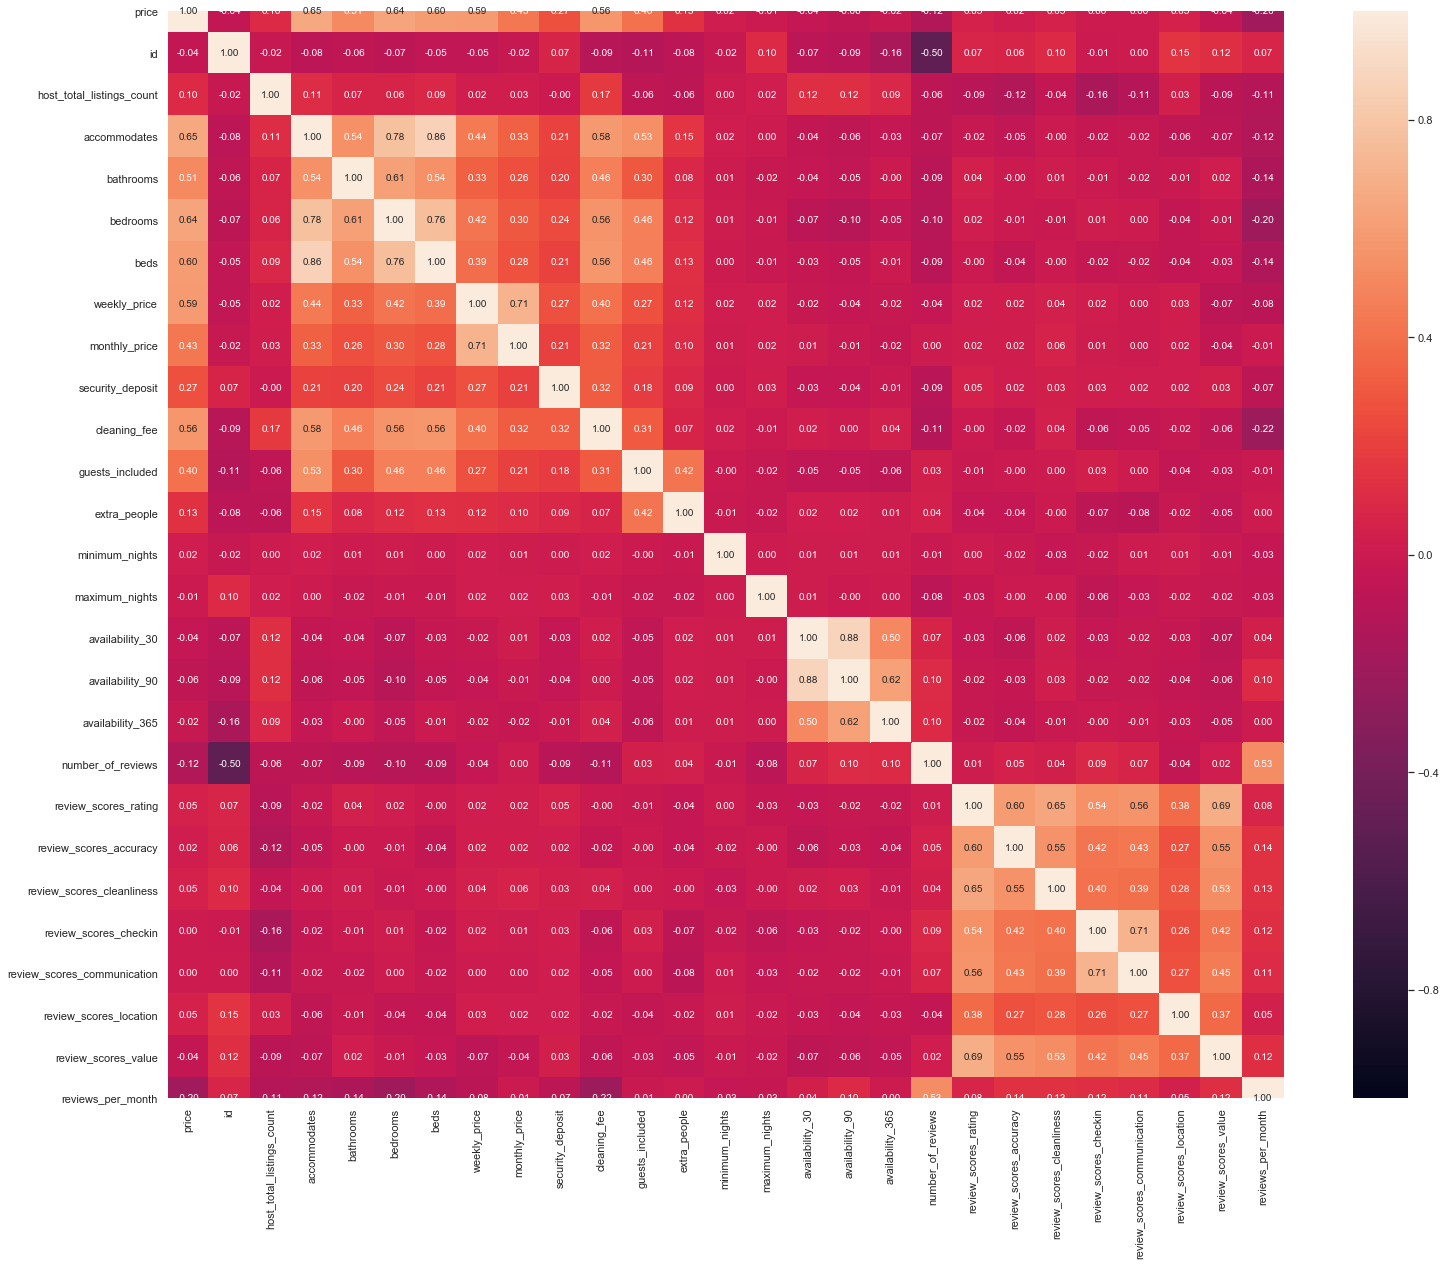

In [6]:
# Correlation between Response and the Predictors
trainDF = pd.concat([price_Train, data_Numeric_Train.reindex(index=data_Numeric_Train.index)], sort = False)

f, axes = plt.subplots(1, 1, figsize=(25, 20))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [7]:
count = 0
highrelation = []
for var in trainDF.corr():
    if(trainDF.corr()['price'][count] > 0.3):
        print("Variables that are Highly Related:",var)
        if(var != "price"):
            highrelation.append(var) 
    count+=1
    
index = 0
Multi_High_Related_Train = {} 
Multi_High_Related_Test = {}

for var in highrelation:
    Multi_High_Related_Train[index]={}  
    Multi_High_Related_Test[index]={} 
    index+=1

index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train:
        Multi_High_Related_Train[index][index2]={}
        Multi_High_Related_Test[index][index2]={}
        index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0

for var in highrelation:
    for var2 in highrelation:
            for var3 in highrelation:
                    Multi_High_Related_Train[index][index2][index3] = {}
                    Multi_High_Related_Test[index][index2][index3] = {}
                    index3+=1
            index2+=1
            index3=0
    index+=1
    index2=0


index = 0
index2 = 0
index3 = 0
index4 = 0

for var in highrelation:
    for var2 in highrelation:
        for var3 in highrelation:
                for var4 in highrelation:
                        Multi_High_Related_Train[index][index2][index3][index4] = {}
                        Multi_High_Related_Test[index][index2][index3][index4] = {}
                        index4+=1
                index4=0
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1


index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in highrelation:
    for var2 in highrelation:
        if(var2!=var):
            for var3 in highrelation:
                if(var3 != var2 and var3 != var):
                    for var4 in highrelation:
                        if(var4!=var3 and var4 != var2 and var4 != var):
                            for var5 in highrelation:
                                if(var5!=var4 and var5!=var3 and var5!=var2 and var5!=var):
                                    Multi_High_Related_Train[index][index2][index3][index4][index5] = pd.DataFrame(data_Numeric_Train[[var,var2,var3,var4,var5]])
                                    Multi_High_Related_Test[index][index2][index3][index4][index5] = pd.DataFrame(data_Numeric_test[[var,var2,var3,var4,var5]])
                                    index5+=1
                            index5=0
                            index4+=1
                    index4=0
                    index3+=1
            index3=0
            index2+=1
    index2=0
    index+=1
    

Variables that are Highly Related: price
Variables that are Highly Related: accommodates
Variables that are Highly Related: bathrooms
Variables that are Highly Related: bedrooms
Variables that are Highly Related: beds
Variables that are Highly Related: weekly_price
Variables that are Highly Related: monthly_price
Variables that are Highly Related: cleaning_fee
Variables that are Highly Related: guests_included


In [8]:
from sklearn.linear_model import LinearRegression

index = 0
linreg = {}

for var in Multi_High_Related_Train:
        linreg[index]={} 
        index+=1
        
index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
            linreg[index][index2]={}
            index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
                linreg[index][index2][index3]={}
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0

for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
            for var4 in Multi_High_Related_Train[var][var2][var3]:
                linreg[index][index2][index3][index4] = {}
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
            for var4 in Multi_High_Related_Train[var][var2][var3]:
                for var5 in Multi_High_Related_Train[var][var2][var3][var4]:
                    linreg[index][index2][index3][index4][index5] = LinearRegression()
                    linreg[index][index2][index3][index4][index5].fit(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train)
                    index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1                
    index2=0
    index+=1

In [9]:
index = 0
price_train_pred = {}
price_test_pred = {}

for var in linreg:
    if(index < len(linreg)):
        price_train_pred[index]={} 
        price_test_pred[index]={} 
        index+=1

index = 0
index2 = 0
for var in linreg:
    for var2 in linreg[var]:
        price_train_pred[index][index2] = {}
        price_test_pred[index][index2] = {}
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in linreg:
    for var2 in linreg[var]:
        for var2 in linreg[var][var2]:
            price_train_pred[index][index2][index3] = {}
            price_test_pred[index][index2][index3] = {}
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0

for var in linreg:
    for var2 in linreg[var]:
        for var3 in linreg[var][var2]:
            for var4 in linreg[var][var2][var3]:
                    price_train_pred[index][index2][index3][index4] = {}
                    price_test_pred[index][index2][index3][index4]={}
                    index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in linreg:
    for var2 in linreg[var]:
        for var3 in linreg[var][var2]:
            for var4 in linreg[var][var2][var3]:
                for var5 in linreg[var][var2][var3][var4]:
                    price_train_pred[index][index2][index3][index4][index5] = linreg[index][index2][index3][index4][index5].predict(Multi_High_Related_Train[index][index2][index3][index4][index5])
                    price_test_pred[index][index2][index3][index4][index5]=linreg[index][index2][index3][index4][index5].predict(Multi_High_Related_Test[index][index2][index3][index4][index5])
                    index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

In [10]:
index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error


for var in price_train_pred:
    for var2 in price_train_pred[var]:
        for var3 in price_train_pred[var][var2]:
            for var4 in price_train_pred[var][var2][var3]:
                for var5 in price_train_pred[var][var2][var3][var4]:
                    if(linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Test[index][index2][index3][index4][index5], price_test)>0.47):
                        print("For [",var,"][",var2,"][",var3,"][",var4,"][",var5,"]")
                        print(Multi_High_Related_Test[index][index2][index3][index4][index5].columns)
                        print("Train Explained Variance (R^2) \t:", linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train))
                        print("Test Explained Variance (R^2) \t:", linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Test[index][index2][index3][index4][index5], price_test))
                        print()
                        index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=0

For [ 0 ][ 0 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413709
Test Explained Variance (R^2) 	: 0.519912962378019

For [ 0 ][ 0 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052319

For [ 0 ][ 0 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 0 ][ 0 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780188

For [ 0 ][ 0 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'weekly_price',
      

Test Explained Variance (R^2) 	: 0.4979602397418622

For [ 0 ][ 0 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.49949777470523105

For [ 0 ][ 0 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5647554667337694
Test Explained Variance (R^2) 	: 0.522160853453498

For [ 0 ][ 0 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048028
Test Explained Variance (R^2) 	: 0.5172621380327636

For [ 0 ][ 0 ][ 3 ][ 1 ][ 3 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5126126342313064
Test Explained Variance (R^2) 	: 0.4939331951481538

For [ 0 ][ 0 ][ 

Test Explained Variance (R^2) 	: 0.4994977747052317

For [ 0 ][ 1 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5767755521357562
Test Explained Variance (R^2) 	: 0.5205552607856818

For [ 0 ][ 1 ][ 0 ][ 2 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.54707032637086
Test Explained Variance (R^2) 	: 0.5184545134977807

For [ 0 ][ 1 ][ 0 ][ 2 ][ 3 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5282311567091036
Test Explained Variance (R^2) 	: 0.49796023974186454

For [ 0 ][ 1 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	:

Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588059

For [ 0 ][ 1 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625635

For [ 0 ][ 1 ][ 3 ][ 3 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5409201466015231
Test Explained Variance (R^2) 	: 0.500288038339862

For [ 0 ][ 1 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5282311567091038
Test Explained Variance (R^2) 	: 0.49796023974186276

For [ 0 ][ 1 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'guests_included', 'beds'], dtype='object')
Train Explained 

For [ 0 ][ 2 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 0 ][ 2 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780193

For [ 0 ][ 2 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705684

For [ 0 ][ 2 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047748

For [ 0 ][ 2 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'gues

For [ 0 ][ 2 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047746

For [ 0 ][ 2 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 0 ][ 2 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438124

For [ 0 ][ 2 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047746

For [ 0 ][ 2 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_pri

For [ 0 ][ 3 ][ 1 ][ 3 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625651

For [ 0 ][ 3 ][ 1 ][ 3 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5852271897081059
Test Explained Variance (R^2) 	: 0.5205650569287918

For [ 0 ][ 3 ][ 1 ][ 4 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.5182977051516549

For [ 0 ][ 3 ][ 1 ][ 4 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'guests_included', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442173
Test Explained Variance (R^2) 	: 0.4982924686376078

For [ 0 ][ 3 ][ 1 ]

Test Explained Variance (R^2) 	: 0.5213971033047746

For [ 0 ][ 3 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5677859278326894
Test Explained Variance (R^2) 	: 0.5152367555760013

For [ 0 ][ 3 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5698930958635476
Test Explained Variance (R^2) 	: 0.5135255271165452

For [ 0 ][ 3 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451518

For [ 0 ][ 3 ][ 4 ][ 3 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test E

Train Explained Variance (R^2) 	: 0.516410782239958
Test Explained Variance (R^2) 	: 0.47431746377289297

For [ 0 ][ 4 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.576775552135756
Test Explained Variance (R^2) 	: 0.5205552607856816

For [ 0 ][ 4 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705684

For [ 0 ][ 4 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625669

For [ 0 ][ 4 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance

Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625651

For [ 0 ][ 4 ][ 4 ][ 1 ][ 3 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.540920146601523
Test Explained Variance (R^2) 	: 0.5002880383398631

For [ 0 ][ 4 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327636

For [ 0 ][ 4 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 0 ][ 4 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'beds',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.56778592

Train Explained Variance (R^2) 	: 0.5911088377227621
Test Explained Variance (R^2) 	: 0.5367103925100107

For [ 0 ][ 5 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708598
Test Explained Variance (R^2) 	: 0.5184545134977813

For [ 0 ][ 5 ][ 1 ][ 0 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 0 ][ 5 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 0 ][ 5 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.58404332708228

For [ 0 ][ 5 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 0 ][ 5 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bedrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625636

For [ 0 ][ 5 ][ 4 ][ 1 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.540920146601523
Test Explained Variance (R^2) 	: 0.5002880383398631

For [ 0 ][ 5 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327636

For [ 0 ][ 5 ][ 4 ][ 2 ][ 1 ]
Index(['ac

Train Explained Variance (R^2) 	: 0.5665223563758435
Test Explained Variance (R^2) 	: 0.5189993326815234

For [ 0 ][ 6 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'guests_included', 'beds', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442176
Test Explained Variance (R^2) 	: 0.498292468637608

For [ 0 ][ 6 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'guests_included', 'beds', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.546231734712781
Test Explained Variance (R^2) 	: 0.48744576981341803

For [ 0 ][ 6 ][ 2 ][ 2 ][ 3 ]
Index(['accommodates', 'guests_included', 'beds', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5698930958635475
Test Explained Variance (R^2) 	: 0.5135255271165455

For [ 0 ][ 6 ][ 2 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'beds', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R

For [ 0 ][ 6 ][ 5 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532068

For [ 0 ][ 6 ][ 5 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.585227189708106
Test Explained Variance (R^2) 	: 0.5205650569287921

For [ 0 ][ 6 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'weekly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5698930958635476
Test Explained Variance (R^2) 	: 0.5135255271165451

For [ 0 ][ 6 ][ 5 ][ 3 ][ 3 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227037
Test Explained Variance (R^2) 	: 0.512474091

For [ 1 ][ 0 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532096

For [ 1 ][ 0 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.5182977051516542

For [ 1 ][ 0 ][ 2 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'guests_included', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5665223563758436
Test Explained Variance (R^2) 	: 0.518999332681524

For [ 1 ][ 0 ][ 2 ][ 4 ][ 2 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686408
Test Explained Variance (R^2) 	: 0.519227100632598

For [ 1 ][ 0 ]

For [ 1 ][ 0 ][ 5 ][ 4 ][ 3 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742937
Test Explained Variance (R^2) 	: 0.5151584354686378

For [ 1 ][ 1 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780203

For [ 1 ][ 1 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052318

For [ 1 ][ 1 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 1 ][ 1 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bath

For [ 1 ][ 1 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705664

For [ 1 ][ 1 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777569
Test Explained Variance (R^2) 	: 0.5011034735588059

For [ 1 ][ 1 ][ 3 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5164107822399578
Test Explained Variance (R^2) 	: 0.47431746377289685

For [ 1 ][ 1 ][ 3 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5767755521357562
Test Explained Variance (R^2) 	: 0.5205552607856831

For [ 1 ][ 1 ][ 3 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms'

Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780194

For [ 1 ][ 2 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052307

For [ 1 ][ 2 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 1 ][ 2 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780193

For [ 1 ][ 2 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.50072255

Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 1 ][ 2 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047746

For [ 1 ][ 2 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 1 ][ 2 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438124

For [ 1 ][ 2 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0

Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625651

For [ 1 ][ 3 ][ 1 ][ 3 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5852271897081059
Test Explained Variance (R^2) 	: 0.5205650569287918

For [ 1 ][ 3 ][ 1 ][ 4 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.5182977051516549

For [ 1 ][ 3 ][ 1 ][ 4 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'guests_included', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442173
Test Explained Variance (R^2) 	: 0.4982924686376078

For [ 1 ][ 3 ][ 1 ][ 4 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained 

Test Explained Variance (R^2) 	: 0.5382584345451518

For [ 1 ][ 3 ][ 4 ][ 3 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625642

For [ 1 ][ 3 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5677859278326894
Test Explained Variance (R^2) 	: 0.5152367555760013

For [ 1 ][ 3 ][ 4 ][ 3 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227038
Test Explained Variance (R^2) 	: 0.5124740911059261

For [ 1 ][ 3 ][ 4 ][ 4 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.583479270966

Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705684

For [ 1 ][ 4 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625669

For [ 1 ][ 4 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.49927140833438133

For [ 1 ][ 4 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708598
Test Explained Variance (R^2) 	: 0.5184545134977813

For [ 1 ][ 4 ][ 1 ][ 3 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Varianc

For [ 1 ][ 4 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 1 ][ 4 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'beds',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5677859278326894
Test Explained Variance (R^2) 	: 0.5152367555760016

For [ 1 ][ 4 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5210446541487068
Test Explained Variance (R^2) 	: 0.4859065390907932

For [ 1 ][ 4 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451518

For [ 1 ][ 4 ][ 4 ][ 3 ][

Test Explained Variance (R^2) 	: 0.5213971033047748

For [ 1 ][ 5 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'beds', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 1 ][ 5 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.591108837722762
Test Explained Variance (R^2) 	: 0.5367103925100107

For [ 1 ][ 5 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047748

For [ 1 ][ 5 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.521893994062565

Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327636

For [ 1 ][ 5 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 1 ][ 5 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5677859278326894
Test Explained Variance (R^2) 	: 0.5152367555760013

For [ 1 ][ 5 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5210446541487068
Test Explained Variance (R^2) 	: 0.4859065390907932

For [ 1 ][ 5 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance 

Train Explained Variance (R^2) 	: 0.5698930958635475
Test Explained Variance (R^2) 	: 0.5135255271165455

For [ 1 ][ 6 ][ 2 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'beds', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5126126342313063
Test Explained Variance (R^2) 	: 0.4939331951481554

For [ 1 ][ 6 ][ 2 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'beds', 'monthly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5164107822399578
Test Explained Variance (R^2) 	: 0.47431746377289274

For [ 1 ][ 6 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'beds', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.546231734712781
Test Explained Variance (R^2) 	: 0.48744576981341814

For [ 1 ][ 6 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'guests_included', 'beds', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Varianc

Train Explained Variance (R^2) 	: 0.5686650983227037
Test Explained Variance (R^2) 	: 0.5124740911059261

For [ 1 ][ 6 ][ 5 ][ 4 ][ 0 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686365

For [ 1 ][ 6 ][ 5 ][ 4 ][ 1 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5409201466015231
Test Explained Variance (R^2) 	: 0.5002880383398631

For [ 1 ][ 6 ][ 5 ][ 4 ][ 2 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5210446541487068
Test Explained Variance (R^2) 	: 0.4859065390907935

For [ 1 ][ 6 ][ 5 ][ 4 ][ 3 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'monthly_price',
       'weekly_price'],
      dty

For [ 2 ][ 0 ][ 3 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'bedrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.54707032637086
Test Explained Variance (R^2) 	: 0.5184545134977812

For [ 2 ][ 0 ][ 3 ][ 0 ][ 3 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5282311567091038
Test Explained Variance (R^2) 	: 0.4979602397418622

For [ 2 ][ 0 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.49949777470523105

For [ 2 ][ 0 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5647554667337694
Test Explained Variance (R^2) 	: 0.522160853453498

For [ 2 ][ 0 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates

Test Explained Variance (R^2) 	: 0.536710392510011

For [ 2 ][ 1 ][ 0 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.5182977051516563

For [ 2 ][ 1 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052317

For [ 2 ][ 1 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5767755521357562
Test Explained Variance (R^2) 	: 0.5205552607856818

For [ 2 ][ 1 ][ 0 ][ 2 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.54707032637086
Test Explained Variance (R^2) 	: 0.

For [ 2 ][ 1 ][ 3 ][ 3 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588059

For [ 2 ][ 1 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625635

For [ 2 ][ 1 ][ 3 ][ 3 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5409201466015231
Test Explained Variance (R^2) 	: 0.500288038339862

For [ 2 ][ 1 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5282311567091038
Test Explained Variance (R^2) 	: 0.49796023974186276

For [ 2 ][ 1 ][ 3 ]

For [ 2 ][ 2 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052307

For [ 2 ][ 2 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 2 ][ 2 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780193

For [ 2 ][ 2 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705684

For [ 2 ][ 2 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'cleani

For [ 2 ][ 2 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.483313482471169

For [ 2 ][ 2 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedrooms', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 2 ][ 2 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047746

For [ 2 ][ 2 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 2 ][ 2 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'weekly_pri

For [ 2 ][ 3 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442173
Test Explained Variance (R^2) 	: 0.4982924686376078

For [ 2 ][ 3 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.576775552135756
Test Explained Variance (R^2) 	: 0.5205552607856773

For [ 2 ][ 3 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.500722556570568

For [ 2 ][ 3 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625632

For [ 2 ][ 3 ][ 1 ][ 2 ][ 3 ]
Index(['accommoda

For [ 2 ][ 3 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451528

For [ 2 ][ 3 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532067

For [ 2 ][ 3 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.591108837722762
Test Explained Variance (R^2) 	: 0.5367103925100105

For [ 2 ][ 3 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047746

For [ 2 ][ 3 ][ 4 ][ 1 ]

For [ 2 ][ 4 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.576775552135756
Test Explained Variance (R^2) 	: 0.5205552607856812

For [ 2 ][ 4 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708598
Test Explained Variance (R^2) 	: 0.5184545134977813

For [ 2 ][ 4 ][ 1 ][ 0 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5282311567091036
Test Explained Variance (R^2) 	: 0.4979602397418631

For [ 2 ][ 4 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.49949777470523093

For [ 2 ][ 4 ][ 1 ][ 1 ][ 1 ]
I

Test Explained Variance (R^2) 	: 0.5192271006325954

For [ 2 ][ 4 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.49927140833438255

For [ 2 ][ 4 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.546231734712781
Test Explained Variance (R^2) 	: 0.4874457698134179

For [ 2 ][ 4 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227038
Test Explained Variance (R^2) 	: 0.512474091105926

For [ 2 ][ 4 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708

For [ 2 ][ 5 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.54707032637086
Test Explained Variance (R^2) 	: 0.5184545134977814

For [ 2 ][ 5 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327636

For [ 2 ][ 5 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451522

For [ 2 ][ 5 ][ 0 ][ 3 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742937
Test Explained Variance (R^2) 	: 0.5151584354686365

For [ 2 ][ 5 ][ 0 ][

Train Explained Variance (R^2) 	: 0.5686650983227037
Test Explained Variance (R^2) 	: 0.512474091105926

For [ 2 ][ 5 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662272
Test Explained Variance (R^2) 	: 0.5362440431532067

For [ 2 ][ 5 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.585227189708106
Test Explained Variance (R^2) 	: 0.5205650569287921

For [ 2 ][ 5 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5698930958635476
Test Explained Variance (R^2) 	: 0.5135255271165452

For [ 2 ][ 5 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'monthly_price'],
      dtype='o

Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.4992714083343802

For [ 2 ][ 6 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.585227189708106
Test Explained Variance (R^2) 	: 0.5205650569287916

For [ 2 ][ 6 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5282311567091036
Test Explained Variance (R^2) 	: 0.497960239741863

For [ 2 ][ 6 ][ 1 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.516410782239958
Test Explained Variance (R^2) 	: 0.47431746377289286

For [ 2 ][ 6 ][ 1 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained 

For [ 2 ][ 6 ][ 5 ][ 0 ][ 0 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 2 ][ 6 ][ 5 ][ 0 ][ 1 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.4833134824711691

For [ 2 ][ 6 ][ 5 ][ 0 ][ 2 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532067

For [ 2 ][ 6 ][ 5 ][ 0 ][ 3 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686363

For [ 2 ][ 6 

Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451498

For [ 3 ][ 0 ][ 2 ][ 2 ][ 3 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686408
Test Explained Variance (R^2) 	: 0.5192271006325959

For [ 3 ][ 0 ][ 2 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.591108837722762
Test Explained Variance (R^2) 	: 0.536710392510009

For [ 3 ][ 0 ][ 2 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438144

For [ 3 ][ 0 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Varian

Test Explained Variance (R^2) 	: 0.49393319514815265

For [ 3 ][ 0 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686408
Test Explained Variance (R^2) 	: 0.5192271006325926

For [ 3 ][ 0 ][ 5 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686374

For [ 3 ][ 0 ][ 5 ][ 4 ][ 0 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 3 ][ 0 ][ 5 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explai

Test Explained Variance (R^2) 	: 0.5205552607856827

For [ 3 ][ 1 ][ 3 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708598
Test Explained Variance (R^2) 	: 0.5184545134977818

For [ 3 ][ 1 ][ 3 ][ 0 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5282311567091036
Test Explained Variance (R^2) 	: 0.49796023974186276

For [ 3 ][ 1 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052315

For [ 3 ][ 1 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.50072255657056

Train Explained Variance (R^2) 	: 0.5818213867098619
Test Explained Variance (R^2) 	: 0.5387589876438124

For [ 3 ][ 2 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'beds', 'bathrooms', 'cleaning_fee', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048028
Test Explained Variance (R^2) 	: 0.5172621380327633

For [ 3 ][ 2 ][ 0 ][ 3 ][ 3 ]
Index(['accommodates', 'beds', 'bathrooms', 'cleaning_fee', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.4833134824711691

For [ 3 ][ 2 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780194

For [ 3 ][ 2 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4

Test Explained Variance (R^2) 	: 0.4859065390907933

For [ 3 ][ 2 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 3 ][ 2 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438126

For [ 3 ][ 2 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327633

For [ 3 ][ 2 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.483313482471169

For [ 3 ][ 2 ][ 4 ][ 1 ][ 0 ]
In

For [ 3 ][ 3 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625632

For [ 3 ][ 3 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.4992714083343852

For [ 3 ][ 3 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.591108837722762
Test Explained Variance (R^2) 	: 0.5367103925100107

For [ 3 ][ 3 ][ 1 ][ 3 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047744

For [ 3 ][ 3 ][ 1 ][ 3 ][ 2

For [ 3 ][ 3 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047746

For [ 3 ][ 3 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5677859278326894
Test Explained Variance (R^2) 	: 0.5152367555760013

For [ 3 ][ 3 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5698930958635476
Test Explained Variance (R^2) 	: 0.5135255271165452

For [ 3 ][ 3 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451518

For [ 3 ][ 3 ][ 4 ][ 3 ][ 1 

For [ 3 ][ 4 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.49949777470523093

For [ 3 ][ 4 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705684

For [ 3 ][ 4 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 3 ][ 4 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.516410782239958
Test Explained Variance (R^2) 	: 0.47431746377289297

For [ 3 ][ 4 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'we

Test Explained Variance (R^2) 	: 0.5192271006325954

For [ 3 ][ 4 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.49927140833438255

For [ 3 ][ 4 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.546231734712781
Test Explained Variance (R^2) 	: 0.4874457698134179

For [ 3 ][ 4 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227038
Test Explained Variance (R^2) 	: 0.512474091105926

For [ 3 ][ 4 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708

For [ 3 ][ 5 ][ 0 ][ 3 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742937
Test Explained Variance (R^2) 	: 0.5151584354686365

For [ 3 ][ 5 ][ 0 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 3 ][ 5 ][ 0 ][ 4 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.483313482471169

For [ 3 ][ 5 ][ 0 ][ 4 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532067

For [ 3 ][ 5 ]

Train Explained Variance (R^2) 	: 0.5834792709662272
Test Explained Variance (R^2) 	: 0.5362440431532067

For [ 3 ][ 5 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.585227189708106
Test Explained Variance (R^2) 	: 0.5205650569287921

For [ 3 ][ 5 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5698930958635476
Test Explained Variance (R^2) 	: 0.5135255271165452

For [ 3 ][ 5 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227038
Test Explained Variance (R^2) 	: 0.5124740911059262

For [ 3 ][ 5 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bathrooms',
       'bedrooms'],
      dtype='object

For [ 3 ][ 6 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.518297705151655

For [ 3 ][ 6 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442173
Test Explained Variance (R^2) 	: 0.4982924686376078

For [ 3 ][ 6 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.4992714083343802

For [ 3 ][ 6 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.585227189708106
Test Explained Variance (R^2) 	: 0.5205650569287916

For [ 3 ][ 6 ][ 1 

For [ 3 ][ 6 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686406
Test Explained Variance (R^2) 	: 0.5192271006325956

For [ 3 ][ 6 ][ 4 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.4992714083343823

For [ 3 ][ 6 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'weekly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.546231734712781
Test Explained Variance (R^2) 	: 0.4874457698134176

For [ 3 ][ 6 ][ 4 ][ 3 ][ 3 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227038
Test Explained Variance (R^2) 	: 0.5124740

For [ 4 ][ 0 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780189

For [ 4 ][ 0 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'bedrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.576775552135756
Test Explained Variance (R^2) 	: 0.5205552607856798

For [ 4 ][ 0 ][ 2 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'bedrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.591108837722762
Test Explained Variance (R^2) 	: 0.536710392510009

For [ 4 ][ 0 ][ 2 ][ 0 ][ 3 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.5182977051516542

For [ 4 ][ 0 ][ 2 ][ 1 ][ 0 ]
Index(

For [ 4 ][ 0 ][ 4 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'guests_included', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.48331348247116923

For [ 4 ][ 0 ][ 4 ][ 4 ][ 2 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532053

For [ 4 ][ 0 ][ 4 ][ 4 ][ 3 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686376

For [ 4 ][ 0 ][ 5 ][ 2 ][ 0 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.5182977051516544

For [ 4 ][ 0

Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705682

For [ 4 ][ 1 ][ 2 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047744

For [ 4 ][ 1 ][ 2 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442173
Test Explained Variance (R^2) 	: 0.49829246863760684

For [ 4 ][ 1 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5767755521357562
Test Explained Variance (R^2) 	: 0.5205552607856803

For [ 4 ][ 1 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained

Test Explained Variance (R^2) 	: 0.4743174637728955

For [ 4 ][ 1 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.4992714083343809

For [ 4 ][ 1 ][ 5 ][ 3 ][ 3 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5409201466015232
Test Explained Variance (R^2) 	: 0.5002880383398628

For [ 4 ][ 1 ][ 5 ][ 4 ][ 0 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183932

For [ 4 ][ 2 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413709
Test Explained Varian

Train Explained Variance (R^2) 	: 0.5126126342313064
Test Explained Variance (R^2) 	: 0.49393319514815626

For [ 4 ][ 2 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052308

For [ 4 ][ 2 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705695

For [ 4 ][ 2 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588054

For [ 4 ][ 2 ][ 3 ][ 1 ][ 3 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5164107822399578
Test Explained Variance (R^2) 	:

Train Explained Variance (R^2) 	: 0.591108837722762
Test Explained Variance (R^2) 	: 0.5367103925100106

For [ 4 ][ 3 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438126

For [ 4 ][ 3 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451531

For [ 4 ][ 3 ][ 0 ][ 3 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532072

For [ 4 ][ 3 ][ 0 ][ 4 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Var

Train Explained Variance (R^2) 	: 0.5462317347127811
Test Explained Variance (R^2) 	: 0.4874457698134179

For [ 4 ][ 3 ][ 3 ][ 3 ][ 0 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451518

For [ 4 ][ 3 ][ 3 ][ 3 ][ 1 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625642

For [ 4 ][ 3 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'cleaning_fee',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5677859278326894
Test Explained Variance (R^2) 	: 0.5152367555760015

For [ 4 ][ 3 ][ 3 ][ 3 ][ 3 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object

Train Explained Variance (R^2) 	: 0.5282311567091036
Test Explained Variance (R^2) 	: 0.4979602397418631

For [ 4 ][ 4 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bathrooms', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052308

For [ 4 ][ 4 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bathrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5647554667337694
Test Explained Variance (R^2) 	: 0.5221608534534989

For [ 4 ][ 4 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bathrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327636

For [ 4 ][ 4 ][ 0 ][ 1 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bathrooms', 'beds',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5126126342313063
Test Explained V

Test Explained Variance (R^2) 	: 0.47431746377289286

For [ 4 ][ 4 ][ 2 ][ 4 ][ 2 ]
Index(['accommodates', 'monthly_price', 'beds', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.546231734712781
Test Explained Variance (R^2) 	: 0.48744576981341803

For [ 4 ][ 4 ][ 2 ][ 4 ][ 3 ]
Index(['accommodates', 'monthly_price', 'beds', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5210446541487068
Test Explained Variance (R^2) 	: 0.4859065390907932

For [ 4 ][ 4 ][ 3 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.576775552135756
Test Explained Variance (R^2) 	: 0.5205552607856803

For [ 4 ][ 4 ][ 3 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5647554667337694
Test Explained Variance (

Test Explained Variance (R^2) 	: 0.5192271006325955

For [ 4 ][ 4 ][ 5 ][ 3 ][ 1 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.49927140833438255

For [ 4 ][ 4 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'weekly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.546231734712781
Test Explained Variance (R^2) 	: 0.4874457698134179

For [ 4 ][ 4 ][ 5 ][ 3 ][ 3 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227038
Test Explained Variance (R^2) 	: 0.512474091105926

For [ 4 ][ 4 ][ 5 ][ 4 ][ 0 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.536909

Train Explained Variance (R^2) 	: 0.5677859278326894
Test Explained Variance (R^2) 	: 0.5152367555760016

For [ 4 ][ 5 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5210446541487069
Test Explained Variance (R^2) 	: 0.48590653909079307

For [ 4 ][ 5 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.4833134824711691

For [ 4 ][ 5 ][ 3 ][ 0 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.591108837722762
Test Explained Variance (R^2) 	: 0.5367103925100105

For [ 4 ][ 5 ][ 3 ][ 0 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.581821386

Train Explained Variance (R^2) 	: 0.5686650983227037
Test Explained Variance (R^2) 	: 0.5124740911059261

For [ 4 ][ 6 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'weekly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.5182977051516547

For [ 4 ][ 6 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5665223563758436
Test Explained Variance (R^2) 	: 0.5189993326815234

For [ 4 ][ 6 ][ 0 ][ 2 ][ 2 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686408
Test Explained Variance (R^2) 	: 0.5192271006325968

For [ 4 ][ 6 ][ 0 ][ 2 ][ 3 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explai

For [ 4 ][ 6 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686408
Test Explained Variance (R^2) 	: 0.5192271006325954

For [ 4 ][ 6 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686363

For [ 4 ][ 6 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5282311567091036
Test Explained Variance (R^2) 	: 0.4979602397418632

For [ 4 ][ 6 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5164107822399577
Test Explained Variance (R^2) 	: 0.47431746377289274

For [ 4 ]

For [ 5 ][ 0 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'bathrooms', 'beds', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5126126342313064
Test Explained Variance (R^2) 	: 0.4939331951481538

For [ 5 ][ 0 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'beds', 'cleaning_fee', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 5 ][ 0 ][ 1 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'beds', 'cleaning_fee', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438122

For [ 5 ][ 0 ][ 1 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'beds', 'cleaning_fee', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327647

For [ 5 ][ 0 ][ 1 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'be

Test Explained Variance (R^2) 	: 0.5382584345451522

For [ 5 ][ 0 ][ 4 ][ 2 ][ 3 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532074

For [ 5 ][ 0 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.54707032637086
Test Explained Variance (R^2) 	: 0.5184545134977807

For [ 5 ][ 0 ][ 4 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327633

For [ 5 ][ 0 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Varian

For [ 5 ][ 1 ][ 2 ][ 1 ][ 1 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705682

For [ 5 ][ 1 ][ 2 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047744

For [ 5 ][ 1 ][ 2 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442173
Test Explained Variance (R^2) 	: 0.49829246863760684

For [ 5 ][ 1 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'weekly_price', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5767755521357562
Test Explained Variance (R^2) 	: 0.5205552607856803

For [ 5 ][ 1 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', '

Test Explained Variance (R^2) 	: 0.4743174637728955

For [ 5 ][ 1 ][ 5 ][ 3 ][ 2 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.4992714083343809

For [ 5 ][ 1 ][ 5 ][ 3 ][ 3 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5409201466015232
Test Explained Variance (R^2) 	: 0.5002880383398628

For [ 5 ][ 1 ][ 5 ][ 4 ][ 0 ]
Index(['accommodates', 'bedrooms', 'guests_included', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183932

For [ 5 ][ 2 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413709
Test Explained Varian

For [ 5 ][ 2 ][ 3 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'monthly_price', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327633

For [ 5 ][ 2 ][ 3 ][ 0 ][ 3 ]
Index(['accommodates', 'beds', 'monthly_price', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5126126342313064
Test Explained Variance (R^2) 	: 0.49393319514815626

For [ 5 ][ 2 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052308

For [ 5 ][ 2 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'monthly_price', 'bedrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705695

For [ 5 ][ 2 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'monthly_

For [ 5 ][ 3 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438125

For [ 5 ][ 3 ][ 0 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5665223563758435
Test Explained Variance (R^2) 	: 0.5189993326815234

For [ 5 ][ 3 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5767755521357562
Test Explained Variance (R^2) 	: 0.5205552607856783

For [ 5 ][ 3 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bathrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5647554667337694
Test Explained Variance (R^2) 	: 0.5221608534534979

For [ 5 ][ 3 ][ 0 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_p

Test Explained Variance (R^2) 	: 0.5205552607856802

For [ 5 ][ 3 ][ 3 ][ 0 ][ 1 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5647554667337694
Test Explained Variance (R^2) 	: 0.5221608534534989

For [ 5 ][ 3 ][ 3 ][ 0 ][ 2 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.538258434545152

For [ 5 ][ 3 ][ 3 ][ 0 ][ 3 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686408
Test Explained Variance (R^2) 	: 0.5192271006325955

For [ 5 ][ 3 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'weekly_price', 'monthly_price', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.576775552135756
Test Explained Varia

Train Explained Variance (R^2) 	: 0.585227189708106
Test Explained Variance (R^2) 	: 0.5205650569287921

For [ 5 ][ 3 ][ 5 ][ 4 ][ 2 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'cleaning_fee',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5698930958635476
Test Explained Variance (R^2) 	: 0.5135255271165452

For [ 5 ][ 3 ][ 5 ][ 4 ][ 3 ]
Index(['accommodates', 'weekly_price', 'guests_included', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227038
Test Explained Variance (R^2) 	: 0.512474091105926

For [ 5 ][ 4 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bathrooms', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052308

For [ 5 ][ 4 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bathrooms', 'bedrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance 

For [ 5 ][ 4 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'monthly_price', 'beds', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5647554667337694
Test Explained Variance (R^2) 	: 0.5221608534534992

For [ 5 ][ 4 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'monthly_price', 'beds', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705692

For [ 5 ][ 4 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'monthly_price', 'beds', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5677859278326894
Test Explained Variance (R^2) 	: 0.5152367555760016

For [ 5 ][ 4 ][ 2 ][ 2 ][ 3 ]
Index(['accommodates', 'monthly_price', 'beds', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.546231734712781
Test Explained Variance (R^2) 	: 0.4874457698134186

For [ 5 ][ 4 ][ 2 ][ 3 ][ 0 ]
Index(['accommodat

Train Explained Variance (R^2) 	: 0.5126126342313063
Test Explained Variance (R^2) 	: 0.4939331951481554

For [ 5 ][ 4 ][ 5 ][ 0 ][ 2 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686408
Test Explained Variance (R^2) 	: 0.5192271006325955

For [ 5 ][ 4 ][ 5 ][ 0 ][ 3 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686365

For [ 5 ][ 4 ][ 5 ][ 1 ][ 0 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5282311567091038
Test Explained Variance (R^2) 	: 0.4979602397418631

For [ 5 ][ 4 ][ 5 ][ 1 ][ 1 ]
Index(['accommodates', 'monthly_price', 'guests_included', 'bedrooms', 'beds'], dtype='object')
Train Expl

Test Explained Variance (R^2) 	: 0.5002880383398631

For [ 5 ][ 5 ][ 1 ][ 4 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 5 ][ 5 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 5 ][ 5 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438126

For [ 5 ][ 5 ][ 2 ][ 0 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'bathrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048028
Test Explained Variance (R^2) 	: 0.5172621380327636

For [ 5 ][ 5 

Test Explained Variance (R^2) 	: 0.512474091105926

For [ 5 ][ 5 ][ 5 ][ 0 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 5 ][ 5 ][ 5 ][ 0 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.483313482471169

For [ 5 ][ 5 ][ 5 ][ 0 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532065

For [ 5 ][ 5 ][ 5 ][ 0 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained 

Test Explained Variance (R^2) 	: 0.519227100632595

For [ 5 ][ 6 ][ 3 ][ 0 ][ 3 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532067

For [ 5 ][ 6 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800339
Test Explained Variance (R^2) 	: 0.518297705151655

For [ 5 ][ 6 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442173
Test Explained Variance (R^2) 	: 0.4982924686376078

For [ 5 ][ 6 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'guests_included', 'weekly_price', 'bedrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Va

For [ 6 ][ 0 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5767755521357562
Test Explained Variance (R^2) 	: 0.5205552607856803

For [ 6 ][ 0 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.591108837722762
Test Explained Variance (R^2) 	: 0.5367103925100116

For [ 6 ][ 0 ][ 0 ][ 1 ][ 3 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.5182977051516542

For [ 6 ][ 0 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.49949777470523127

For [ 6 ][ 0 ][ 0 ][ 2 ][ 1 ]
Ind

For [ 6 ][ 0 ][ 3 ][ 2 ][ 2 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451527

For [ 6 ][ 0 ][ 3 ][ 2 ][ 3 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686408
Test Explained Variance (R^2) 	: 0.5192271006325981

For [ 6 ][ 0 ][ 3 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708598
Test Explained Variance (R^2) 	: 0.5184545134977812

For [ 6 ][ 0 ][ 3 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'monthly_price', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327633

For [ 6 ][ 0 ][ 3 

For [ 6 ][ 1 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764615

For [ 6 ][ 1 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5911088377227621
Test Explained Variance (R^2) 	: 0.5367103925100112

For [ 6 ][ 1 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.54707032637086
Test Explained Variance (R^2) 	: 0.5184545134977806

For [ 6 ][ 1 ][ 0 ][ 3 ][ 3 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 6 ][ 1 ][ 1 ][ 0 ][ 0 ]
Inde

Test Explained Variance (R^2) 	: 0.5205552607856831

For [ 6 ][ 1 ][ 3 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.500722556570568

For [ 6 ][ 1 ][ 3 ][ 2 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625649

For [ 6 ][ 1 ][ 3 ][ 2 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.4992714083343841

For [ 6 ][ 1 ][ 3 ][ 3 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708601
Test Explained Variance (

For [ 6 ][ 2 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 6 ][ 2 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780193

For [ 6 ][ 2 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705684

For [ 6 ][ 2 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047748

For [ 6 ][ 2 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'gues

For [ 6 ][ 2 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 6 ][ 2 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438126

For [ 6 ][ 2 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327633

For [ 6 ][ 2 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.483313482471169

For [ 6 ][ 2 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedroom

Test Explained Variance (R^2) 	: 0.5213971033047747

For [ 6 ][ 3 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442173
Test Explained Variance (R^2) 	: 0.4982924686376078

For [ 6 ][ 3 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.576775552135756
Test Explained Variance (R^2) 	: 0.5205552607856773

For [ 6 ][ 3 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.500722556570568

For [ 6 ][ 3 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.521893994062

Test Explained Variance (R^2) 	: 0.5367103925100105

For [ 6 ][ 3 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047746

For [ 6 ][ 3 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625649

For [ 6 ][ 3 ][ 4 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.585227189708106
Test Explained Variance (R^2) 	: 0.5205650569287921

For [ 6 ][ 3 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.538758987

Train Explained Variance (R^2) 	: 0.5282311567091036
Test Explained Variance (R^2) 	: 0.4979602397418631

For [ 6 ][ 4 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.49949777470523093

For [ 6 ][ 4 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705684

For [ 6 ][ 4 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 6 ][ 4 ][ 1 ][ 1 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.516410782239958
Test Explained Variance (R^2) 	: 

Train Explained Variance (R^2) 	: 0.5686650983227038
Test Explained Variance (R^2) 	: 0.512474091105926

For [ 6 ][ 4 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708601
Test Explained Variance (R^2) 	: 0.5184545134977814

For [ 6 ][ 4 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327636

For [ 6 ][ 4 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451527

For [ 6 ][ 4 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'monthly_price', 'cleaning_fee', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Var

Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 6 ][ 5 ][ 0 ][ 4 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.483313482471169

For [ 6 ][ 5 ][ 0 ][ 4 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532067

For [ 6 ][ 5 ][ 0 ][ 4 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'guests_included',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742937
Test Explained Variance (R^2) 	: 0.5151584354686364

For [ 6 ][ 5 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.487

For [ 6 ][ 5 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451518

For [ 6 ][ 5 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742937
Test Explained Variance (R^2) 	: 0.5151584354686365

For [ 6 ][ 5 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708598
Test Explained Variance (R^2) 	: 0.5184545134977813

For [ 6 ][ 5 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'monthly_price', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777567
Test Explained Variance (R^2) 	: 0.5011034735588056

For [ 6 ][ 5 ][ 4 ]

Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.49927140833438255

For [ 6 ][ 6 ][ 1 ][ 3 ][ 3 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5409201466015231
Test Explained Variance (R^2) 	: 0.5002880383398631

For [ 6 ][ 6 ][ 1 ][ 4 ][ 0 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 6 ][ 6 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'guests_included', 'beds', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5665223563758435
Test Explained Variance (R^2) 	: 0.5189993326815234

For [ 6 ][ 6 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'guests_included', 'beds', 'weekly_price', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0

Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.4833134824711691

For [ 6 ][ 6 ][ 5 ][ 0 ][ 2 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532067

For [ 6 ][ 6 ][ 5 ][ 0 ][ 3 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686363

For [ 6 ][ 6 ][ 5 ][ 1 ][ 0 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5157010010557788
Test Explained Variance (R^2) 	: 0.4859134183183933

For [ 6 ][ 6 ][ 5 ][ 2 ][ 0 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'beds', 'bathrooms'], dtype='object')
Train Explain

Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438144

For [ 7 ][ 0 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451519

For [ 7 ][ 0 ][ 2 ][ 3 ][ 3 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532096

For [ 7 ][ 0 ][ 2 ][ 4 ][ 0 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.5182977051516542

For [ 7 ][ 0 ][ 2 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'weekly_price', 'guests_included', 'beds'], dtype='object')
Train Explained


For [ 7 ][ 0 ][ 5 ][ 4 ][ 1 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.48331348247116923

For [ 7 ][ 0 ][ 5 ][ 4 ][ 2 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532052

For [ 7 ][ 0 ][ 5 ][ 4 ][ 3 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742937
Test Explained Variance (R^2) 	: 0.5151584354686378

For [ 7 ][ 1 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780203

For [ 7 ][ 1 ][ 0 ][ 0 ][ 1 ]
Index

For [ 7 ][ 1 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052315

For [ 7 ][ 1 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.5007225565705664

For [ 7 ][ 1 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5393818014777569
Test Explained Variance (R^2) 	: 0.5011034735588059

For [ 7 ][ 1 ][ 3 ][ 1 ][ 3 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5164107822399578
Test Explained Variance (R^2) 	: 0.47431746377289685

For [ 7 ][ 1 ][ 3 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'monthly_price', 'we

Train Explained Variance (R^2) 	: 0.503401109284006
Test Explained Variance (R^2) 	: 0.4833134824711691

For [ 7 ][ 2 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.5199129623780194

For [ 7 ][ 2 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052307

For [ 7 ][ 2 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 7 ][ 2 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'weekly_price', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5767671114413708
Test Explained Variance (R^2) 	: 0.519912962378

For [ 7 ][ 2 ][ 3 ][ 4 ][ 3 ]
Index(['accommodates', 'beds', 'monthly_price', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5210446541487068
Test Explained Variance (R^2) 	: 0.4859065390907933

For [ 7 ][ 2 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5139185891000908
Test Explained Variance (R^2) 	: 0.48795388243764604

For [ 7 ][ 2 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'weekly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438126

For [ 7 ][ 2 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bathrooms', 'monthly_price'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327633

For [ 7 ][ 2 ][ 4 ][ 0 ][ 3 ]
Index(['accommodates', 'beds', 'clea

Test Explained Variance (R^2) 	: 0.4982924686376078

For [ 7 ][ 3 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.576775552135756
Test Explained Variance (R^2) 	: 0.5205552607856773

For [ 7 ][ 3 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.566673745311102
Test Explained Variance (R^2) 	: 0.500722556570568

For [ 7 ][ 3 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625632

For [ 7 ][ 3 ][ 1 ][ 2 ][ 3 ]
Index(['accommodates', 'weekly_price', 'bedrooms', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R

For [ 7 ][ 3 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.584043327082288
Test Explained Variance (R^2) 	: 0.5213971033047746

For [ 7 ][ 3 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625649

For [ 7 ][ 3 ][ 4 ][ 1 ][ 3 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.585227189708106
Test Explained Variance (R^2) 	: 0.5205650569287921

For [ 7 ][ 3 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'weekly_price', 'cleaning_fee', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5818213867098618
Test Explained Variance (R^2) 	: 0.5387589876438126

For [ 7 ][ 3 ][ 4 ][ 2 ][ 1 ]
Index(['accomm

Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686365

For [ 7 ][ 4 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.526874991927486
Test Explained Variance (R^2) 	: 0.4994977747052308

For [ 7 ][ 4 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.576775552135756
Test Explained Variance (R^2) 	: 0.5205552607856812

For [ 7 ][ 4 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5470703263708598
Test Explained Variance (R^2) 	: 0.5184545134977813

For [ 7 ][ 4 ][ 1 ][ 0 ][ 3 ]
Index(['accommodates', 'monthly_price', 'bedrooms', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	

Train Explained Variance (R^2) 	: 0.5677859278326894
Test Explained Variance (R^2) 	: 0.5152367555760013

For [ 7 ][ 4 ][ 3 ][ 3 ][ 3 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227037
Test Explained Variance (R^2) 	: 0.5124740911059262

For [ 7 ][ 4 ][ 3 ][ 4 ][ 0 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5653747347686408
Test Explained Variance (R^2) 	: 0.5192271006325954

For [ 7 ][ 4 ][ 3 ][ 4 ][ 1 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.567390489926568
Test Explained Variance (R^2) 	: 0.49927140833438255

For [ 7 ][ 4 ][ 3 ][ 4 ][ 2 ]
Index(['accommodates', 'monthly_price', 'weekly_price', 'guests_included',
       'beds'],
      dty

For [ 7 ][ 5 ][ 0 ][ 2 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'weekly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.536244043153207

For [ 7 ][ 5 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.54707032637086
Test Explained Variance (R^2) 	: 0.5184545134977814

For [ 7 ][ 5 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5346169367048026
Test Explained Variance (R^2) 	: 0.5172621380327636

For [ 7 ][ 5 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bathrooms', 'monthly_price',
       'weekly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451522

For [ 7 ][ 5 ][ 0 ][ 3

For [ 7 ][ 5 ][ 3 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'monthly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5815185243164142
Test Explained Variance (R^2) 	: 0.5382584345451518

For [ 7 ][ 5 ][ 3 ][ 3 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'monthly_price',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.584070191805228
Test Explained Variance (R^2) 	: 0.5218939940625642

For [ 7 ][ 5 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'monthly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5677859278326893
Test Explained Variance (R^2) 	: 0.5152367555760013

For [ 7 ][ 5 ][ 3 ][ 3 ][ 3 ]
Index(['accommodates', 'cleaning_fee', 'weekly_price', 'monthly_price',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227037
Test Explained Variance (R^2) 	: 0.512474091105926

Train Explained Variance (R^2) 	: 0.5834792709662271
Test Explained Variance (R^2) 	: 0.5362440431532064

For [ 7 ][ 6 ][ 0 ][ 4 ][ 3 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'cleaning_fee',
       'monthly_price'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686363

For [ 7 ][ 6 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5777820929800338
Test Explained Variance (R^2) 	: 0.518297705151655

For [ 7 ][ 6 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5674980319442173
Test Explained Variance (R^2) 	: 0.4982924686376078

For [ 7 ][ 6 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'weekly_price',
       'monthly_price'],
      dtype='object')
Train Explaine

Test Explained Variance (R^2) 	: 0.4992714083343823

For [ 7 ][ 6 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'weekly_price',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.546231734712781
Test Explained Variance (R^2) 	: 0.4874457698134176

For [ 7 ][ 6 ][ 4 ][ 3 ][ 3 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'weekly_price',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5686650983227038
Test Explained Variance (R^2) 	: 0.5124740911059259

For [ 7 ][ 6 ][ 4 ][ 4 ][ 0 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5369098139742938
Test Explained Variance (R^2) 	: 0.5151584354686363

For [ 7 ][ 6 ][ 4 ][ 4 ][ 1 ]
Index(['accommodates', 'guests_included', 'monthly_price', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.54092